In [16]:
#import sys
import pandas as pd
import matplotlib 
import numpy as np
#import scipy as sp
#import IPython
#import sklearn
import mglearn

In [14]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier        # knn
from sklearn.linear_model import LinearRegression         # linear regression: ∑(y - wx)^2
from sklearn.linear_model import Ridge                    # ridge: ∑(y - wx)^2 + α∑(w^2)
from sklearn.linear_model import Lasso                    # lasso: ∑(y - wx)^2 + α|w|
from sklearn.linear_model import LogisticRegression       # sigmoid -> Classification
from sklearn.svm import LinearSVC                         # (점과 초평면의 거리 y = {1. -1}, y(wx + b) >=1  min ||w||)
from sklearn.svm import SVC                               # 커널 서포트 벡터 머신 (C,gamma가 커지면 과대적합)
#from sklearn.linear_model import SGDClassifier           # 하나의 샘플(또는 작은 미니배치)를
#from sklearn.linear_model import SGDRegressor            # 무작위로 뽑아 파라미터를 업데이트
from sklearn.tree import DecisionTreeClassifier           # 결정트리 (분류)
#from sklearn.tree import DecisionTreeRegressor           # 결정트리 (회귀)
from sklearn.ensemble import RandomForestClassifier       # 랜덤 포래스트
from sklearn.ensemble import GradientBoostingClassifier   # 그래디언트 부스팅 회귀 트리
from sklearn.neural_network import MLPClassifier          # 신경망
from sklearn.metrics import accuracy_score

In [76]:
iris = load_iris(as_frame=True)

df = iris.frame

X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
"""
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)

print(prediction)
print(iris['target_names'][prediction])
"""
y_pred = knn.predict(X_test)

print(np.mean(y_pred == y_test))

1.0


In [ ]:
pd.plotting.scatter_matrix(df, c=df.target, figsize=(15, 15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [61]:
# 이진 분류
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# C == 규제 강도의 역수
for C in [0.01, 0.1, 1, 10]:
    print("C:", C)
    logreg = LogisticRegression(C=C, max_iter=10000)
    logreg_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=1000)
    svc = LinearSVC(C=C)

    logreg.fit(X_train, y_train)
    logreg_l1.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    
    print("LogisticRegression (l2)")
    print("train:", logreg.score(X_train, y_train))
    print("test:", logreg.score(X_test, y_test))
    print()
    print("LogisticRegression (l1)")
    print("train:", logreg_l1.score(X_train, y_train))
    print("test:", logreg_l1.score(X_test, y_test))
    print()
    print("support vectot machine")
    print("train:", svc.score(X_train, y_train))
    print("test:", svc.score(X_test, y_test))
    print("W.shape:", svc.coef_.shape, "b.shape", svc.intercept_.shape)
    print()


C: 0.01
LogisticRegression (l2)
train: 0.9516483516483516
test: 0.9649122807017544

LogisticRegression (l1)
train: 0.9120879120879121
test: 0.956140350877193

support vectot machine
train: 0.945054945054945
test: 0.9473684210526315
W.shape: (1, 30) b.shape (1,)

C: 0.1
LogisticRegression (l2)
train: 0.9494505494505494
test: 0.9649122807017544

LogisticRegression (l1)
train: 0.9296703296703297
test: 0.956140350877193

support vectot machine
train: 0.9604395604395605
test: 0.956140350877193
W.shape: (1, 30) b.shape (1,)

C: 1
LogisticRegression (l2)
train: 0.9626373626373627
test: 0.956140350877193

LogisticRegression (l1)
train: 0.9604395604395605
test: 0.956140350877193

support vectot machine
train: 0.9714285714285714
test: 0.956140350877193
W.shape: (1, 30) b.shape (1,)

C: 10
LogisticRegression (l2)
train: 0.978021978021978
test: 0.956140350877193

LogisticRegression (l1)
train: 0.9824175824175824
test: 0.9736842105263158

support vectot machine
train: 0.967032967032967
test: 0.9561

In [30]:
# 결정 트리
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

tree_1 = DecisionTreeClassifier(random_state=0)
tree_2 = DecisionTreeClassifier(random_state=0, max_depth=4)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

print("Tree_1")
print("train:", tree_1.score(X_train, y_train))
print("test:", tree_1.score(X_test, y_test))
print("feture_importance:", tree_1.feature_importances_)
print('-----------')
print("Tree_2")
print("train:", tree_2.score(X_train, y_train))
print("test:", tree_2.score(X_test, y_test))
print("feture_importance:", tree_2.feature_importances_)
print('-----------')

"""
plt.figure(figsize=(12,6))
plot_tree(tree_2, class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()
"""

#결정 트리 앙상블
#랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

print("forest")
print("train:", forest.score(X_train, y_train))
print("test:", forest.score(X_test, y_test))
print('-----------')

# 그래디언트 부스팅 회귀 트리

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Gradient boosting")
print("train:", gbrt.score(X_train, y_train))
print("test:", gbrt.score(X_test, y_test))
print('-----------')

# 커널 서포트 벡터 머신
svc = SVC()
svc.fit(X_train, y_train)

print("SVC")
print("train:", svc.score(X_train, y_train))
print("test:", svc.score(X_test, y_test))
print('-----------')   # 데이터 전처리 필요

min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성 별 최솟값:", X_train_scaled.min(axis=0))
print("특성 별 최대값:", X_train_scaled.max(axis=0))
print()

X_test_scaled = (X_test - min_on_training) / range_on_training

svc2 = SVC(C=20)
svc2.fit(X_train_scaled, y_train)

print("SVC2")
print("train:", svc2.score(X_train_scaled, y_train))
print("test:", svc2.score(X_test_scaled, y_test))

Tree_1
train: 1.0
test: 0.9300699300699301
feture_importance: [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]
-----------
Tree_2
train: 0.9953051643192489
test: 0.951048951048951
feture_importance: [0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]
-----------
forest
train: 1.0
test: 0.972027972027972
-----------
Gradient boosting
train: 0.9929577464788732
test: 0.958041958041958
-----------
SVC
train: 0.9107981220657277
test: 0.951048951048951
----------

train: 0.9953051643192489
test: 0.972027972027972


/home/jeongbyeolsol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jeongbyeolsol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jeongbyeolsol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jeongbyeolsol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45787 (\N{HANGUL SYLLABLE NIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jeongbyeolsol/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/jeongbyeolsol/.local/lib/python3.10/

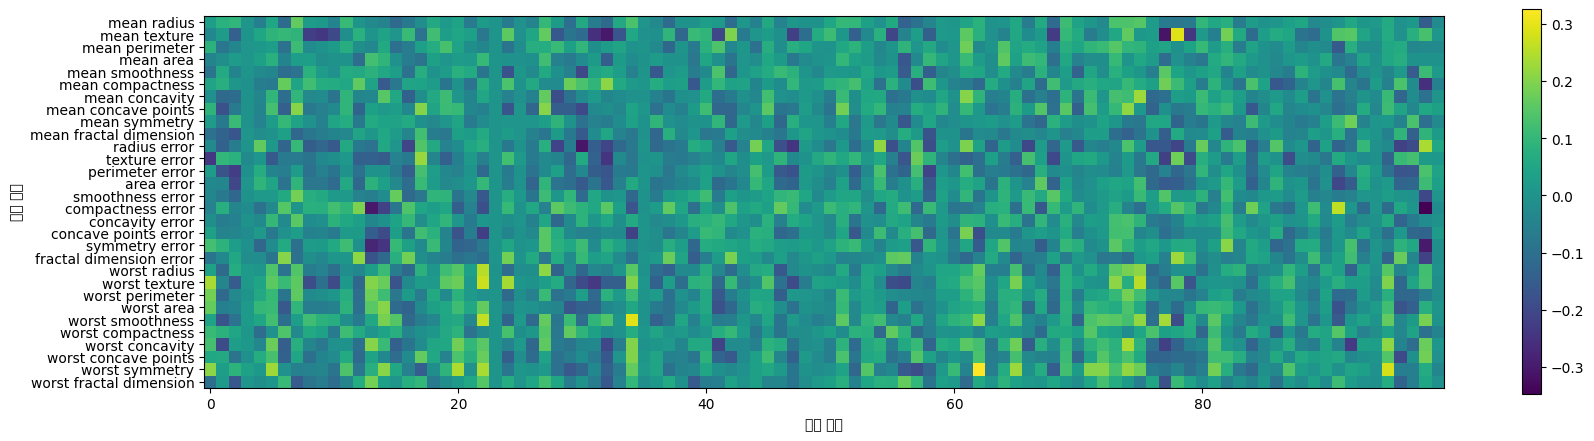

In [34]:
# 신경망
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
"""
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000, alpha=0.01)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
"""

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=42, max_iter=1000, alpha=0.1)
mlp.fit(X_train_scaled, y_train)

print("train:", mlp.score(X_train_scaled, y_train))
print("test:", mlp.score(X_test_scaled, y_test))

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [55]:
#분류 예측의 불확실성 추정(uncertainty estimation in classification)
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=42)

gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train_named)

# 결정 함수

print("X_test.shape", X_test.shape)
print("decision_function(X_test).shape:", gbrt.decision_function(X_test).shape)
print("결정 함수:", gbrt.decision_function(X_test)[:6])
print()
print("result:\n", gbrt.decision_function(X_test) > 0)
print("prediction:\n", gbrt.predict(X_test))
print()
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("Is prediction true?:", np.all(pred == gbrt.predict(X_test)))
print()
decision_function = gbrt.decision_function(X_test)
print("decision function ->", "max:", np.max(decision_function), " min:", np.min(decision_function))

print("\n-------------------\n")

#예측 확률

print("predict_proba(X_test).shape", gbrt.predict_proba(X_test).shape)
print("예측 확률", gbrt.predict_proba(X_test)[:6])

print("\n-------------------\n")

# 다중 분류에서의 불확실성

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt.fit(X_train, y_train)

print("다중 분류\n")
print("decision_function(X_test).shape:", gbrt.decision_function(X_test).shape)
print("결정 함수:", gbrt.decision_function(X_test)[:6])
print("max index:", np.argmax(gbrt.decision_function(X_test), axis=1))
print("prediction:\n", gbrt.predict(X_test))
print()
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
print("sum:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

X_test.shape (25, 2)
decision_function(X_test).shape: (25,)
결정 함수: [-4.38719773 -6.5325788   2.50733531 -4.15357718  2.91966345 -3.95344718]

result:
 [False False  True False  True False False False  True  True  True False
 False  True False False False  True  True False False  True  True  True
 False]
prediction:
 ['blue' 'blue' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red'
 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'blue' 'red'
 'red' 'red' 'blue']

Is prediction true?: True

decision function -> max: 4.114900466385647  min: -7.748618243066826

-------------------

predict_proba(X_test).shape (25, 2)
예측 확률 [[0.98771721 0.01228279]
 [0.99854687 0.00145313]
 [0.07534554 0.92465446]
 [0.9845348  0.0154652 ]
 [0.05119004 0.94880996]
 [0.98117282 0.01882718]]

-------------------

다중 분류

decision_function(X_test).shape: (38, 3)
결정 함수: [[-6.97579793  2.7731495  -4.75421757]
 [ 7.33907946 -1.67857649 -5.37584532]
 [-6.95427555 -4.89666235  5.08699272]
 [-6.975

w[0]: 0.393906  b: -0.031804


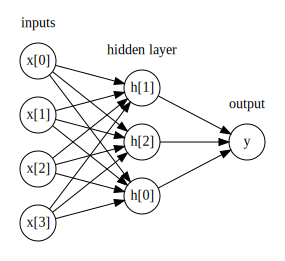

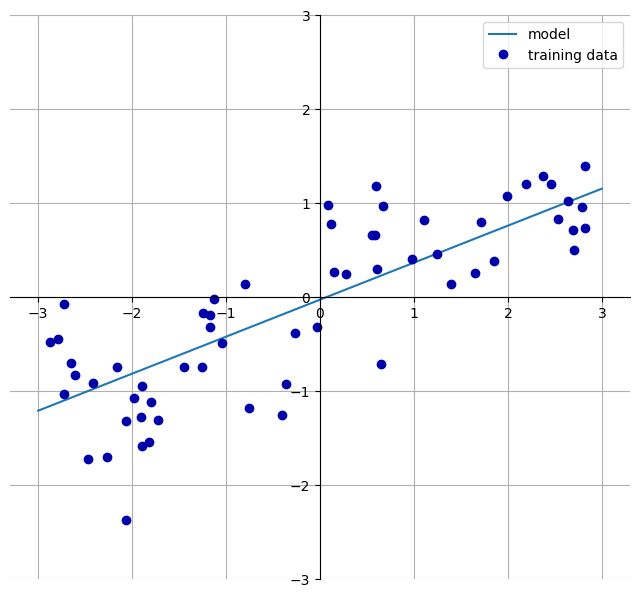

In [9]:
#mglearn.plots.plot_knn_classification(n_neighbors=5)
mglearn.plots.plot_linear_regression_wave()

#mglearn.plots.plot_logistic_regression_graph()
mglearn.plots.plot_single_hidden_layer_graph()